<a href="https://colab.research.google.com/github/animeqvin/neural_network_classification/blob/main/neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
 import sklearn
 from sklearn.datasets import make_circles
 n_samples=1000
 x, y = make_circles(n_samples,
                     noise=0.03,
                     random_state=42)

In [3]:
len(x), len(y)

(1000, 1000)

In [4]:
print(f"first 5 samples of the x:\n {x[:5]}")
print(f"first 5 samples of the y:\n {y[:5]}")


first 5 samples of the x:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
first 5 samples of the y:
 [1 1 1 1 0]


In [5]:
import pandas as pd
circles=pd.DataFrame({"X1:":x[:,0],
                      "X2:":x[:,1],
                      "label" :y})
circles.head(10)

,X1:,X2:,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


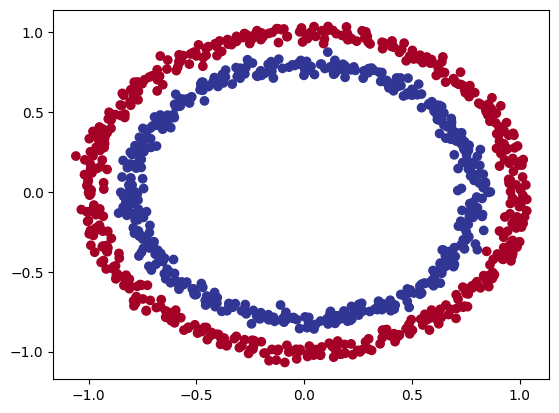

In [6]:
import matplotlib.pyplot as plt
plt.scatter(x=x[:,0],
            y=x[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);


In [7]:
x.shape, y.shape

((1000, 2), (1000,))

In [8]:
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [9]:
x_sample=x[0]
y_sample=y[0]
print(f"values for one sample of X: {x_sample} and the same for y:  {y_sample}")
print(f"shapes for one sample of X: {x_sample.shape} and the same for y:  {y_sample.shape}")

values for one sample of X: [0.75424625 0.23148074] and the same for y:  1
shapes for one sample of X: (2,) and the same for y:  ()


In [10]:
import  torch
torch.__version__

'2.6.0+cu124'

In [11]:
x=torch.from_numpy(x).type(torch.float)
y=torch.from_numpy(y).type(torch.float)
x[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [12]:
type(x), x.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,
                                                  y,
                                                  test_size=0.2,
                                                  random_state=42)


In [14]:
len(x_train), len(x_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [15]:
n_samples

1000

In [16]:
import torch
from torch import nn
device="cuda" if torch.cuda.is_available() else "cpu"
device


'cuda'

In [17]:
x_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

In [18]:
from sklearn import datasets
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2, out_features=5)
    self.layer_2=nn.Linear(in_features=5, out_features=1)
  def forward(self, x):
    return self.layer_2(self.layer_1(x))
model_0=CircleModelV0()
model_0=model_0.to(device)
model_0


CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [19]:
device

'cuda'

In [20]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [21]:
model_0=nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [22]:
untrained_preds=model_0(x_test.to(device))
print(f"length of predictions: {len(untrained_preds)}, shape: {untrained_preds.shape}")
print(f"length of test samples: {len(x_test)}, shape: {x_test.shape}")
print(f"first 10 predictions: {untrained_preds[:10]}")
print(f"first 10 labels: {y_test[:10]}")

length of predictions: 200, shape: torch.Size([200, 1])
length of test samples: 200, shape: torch.Size([200, 2])
first 10 predictions: tensor([[ 0.0778],
        [ 0.1556],
        [-0.1472],
        [ 0.1416],
        [-0.1806],
        [-0.1328],
        [ 0.1127],
        [ 0.0450],
        [-0.1454],
        [ 0.1604]], device='cuda:0', grad_fn=<SliceBackward0>)
first 10 labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [23]:
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.1)

In [24]:
def accuracy_fn(y_true, y_pred):
  correct=torch.eq(y_true, y_pred).sum().item()
  acc=correct/len(y_pred)*100
  return acc


In [25]:
model_0.eval()
with torch.inference_mode():
  y_logits=model_0(x_test.to(device))[:5]
y_logits

tensor([[ 0.0778],
        [ 0.1556],
        [-0.1472],
        [ 0.1416],
        [-0.1806]], device='cuda:0')

In [26]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5194],
        [0.5388],
        [0.4633],
        [0.5353],
        [0.4550]], device='cuda:0')

In [27]:
y_preds=torch.round(y_pred_probs)
y_pred_labels=torch.round(torch.sigmoid(model_0(x_test.to(device))[:5]))
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))
y_preds.squeeze()


tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 0., 1., 0.], device='cuda:0')

In [28]:
device

'cuda'

In [29]:
torch.manual_seed(42)
epochs=100
x_train, y_train=x_train.to(device), y_train.to(device)
x_test, y_test=x_test.to(device), y_test.to(device)
for epoch in range(epochs):
  #training
  model_0.train()
  #do the forward pass
  y_logits=model_0(x_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))
  #calculate the loss
  loss=loss_fn(y_logits, y_train)
  acc=accuracy_fn(y_true=y_train, y_pred=y_pred)
  #optimize the 0 grad
  optimizer.zero_grad()
  #looss backward
  loss.backward()
  #optimize the step step step
  optimizer.step()
  #testing
  model_0.eval()
  with torch.inference_mode():
    #forward pass
    test_logits=model_0(x_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))
    #calculate the test loss
    test_loss=loss_fn(test_logits, y_test)
    test_acc= accuracy_fn(y_true=y_test, y_pred=test_pred)
  if epoch%10==0:
    print(f"epochs: {epoch} | loss {loss:.5f}, acc: {acc:.2f}% | test loss {test_loss:.5f}, test acc: {test_acc:.2f}%")



epochs: 0 | loss 0.69456, acc: 50.38% | test loss 0.70054, test acc: 46.00%
epochs: 10 | loss 0.69405, acc: 50.75% | test loss 0.69976, test acc: 45.50%
epochs: 20 | loss 0.69381, acc: 51.25% | test loss 0.69923, test acc: 46.00%
epochs: 30 | loss 0.69366, acc: 51.38% | test loss 0.69882, test acc: 46.00%
epochs: 40 | loss 0.69356, acc: 51.12% | test loss 0.69847, test acc: 45.50%
epochs: 50 | loss 0.69348, acc: 50.88% | test loss 0.69817, test acc: 45.50%
epochs: 60 | loss 0.69342, acc: 51.50% | test loss 0.69791, test acc: 46.00%
epochs: 70 | loss 0.69337, acc: 51.38% | test loss 0.69768, test acc: 46.00%
epochs: 80 | loss 0.69333, acc: 51.25% | test loss 0.69748, test acc: 47.00%
epochs: 90 | loss 0.69329, acc: 51.25% | test loss 0.69730, test acc: 47.00%


In [30]:
circles.label.value_counts()

,count
label,
1,500
0,500


In [31]:
import requests
from pathlib import Path
if Path("helper_functions.py").is_file():
  print("good")
else:
  print("try it")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
     f.write(request.content)
from helper_functions import plot_predictions, plot_decision_boundary

try it


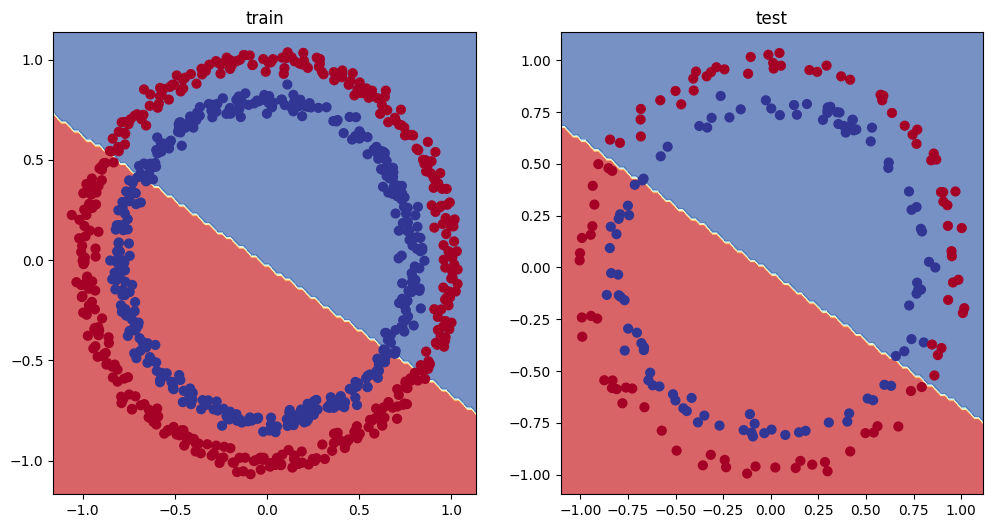

In [32]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_0, x_train, y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_0, x_test, y_test)


In [33]:
#improving a model
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2, out_features=10)
    self.layer_2=nn.Linear(in_features=10, out_features=10)
    self.layer_3=nn.Linear(in_features=10, out_features=1)
  def forward(self, x):
    z=self.layer_1(x)
    z=self.layer_2(z)
    z=self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x)))
model_1=CircleModelV1().to(device)
model_1


CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [34]:
# loss_fn = nn.BCELoss() # Requires sigmoid on input
loss_fn = nn.BCEWithLogitsLoss() # Does not require sigmoid on input
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

In [35]:
torch.manual_seed(42)
epochs = 1000
x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

model_1.to(device)  # Move the model to the desired device

for epoch in range(epochs):
    model_1.train()
    y_logits = model_1(x_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_1.eval()
    with torch.inference_mode():
        test_logits = model_1(x_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)
    if epoch % 100 == 0:
        print(f"Epochs: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")


Epochs: 0 | Loss: 0.69396, Acc: 50.88% | Test Loss: 0.69261, Test Acc: 51.00%
Epochs: 100 | Loss: 0.69305, Acc: 50.38% | Test Loss: 0.69379, Test Acc: 48.00%
Epochs: 200 | Loss: 0.69299, Acc: 51.12% | Test Loss: 0.69437, Test Acc: 46.00%
Epochs: 300 | Loss: 0.69298, Acc: 51.62% | Test Loss: 0.69458, Test Acc: 45.00%
Epochs: 400 | Loss: 0.69298, Acc: 51.12% | Test Loss: 0.69465, Test Acc: 46.00%
Epochs: 500 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69467, Test Acc: 46.00%
Epochs: 600 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69468, Test Acc: 46.00%
Epochs: 700 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69468, Test Acc: 46.00%
Epochs: 800 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69468, Test Acc: 46.00%
Epochs: 900 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69468, Test Acc: 46.00%


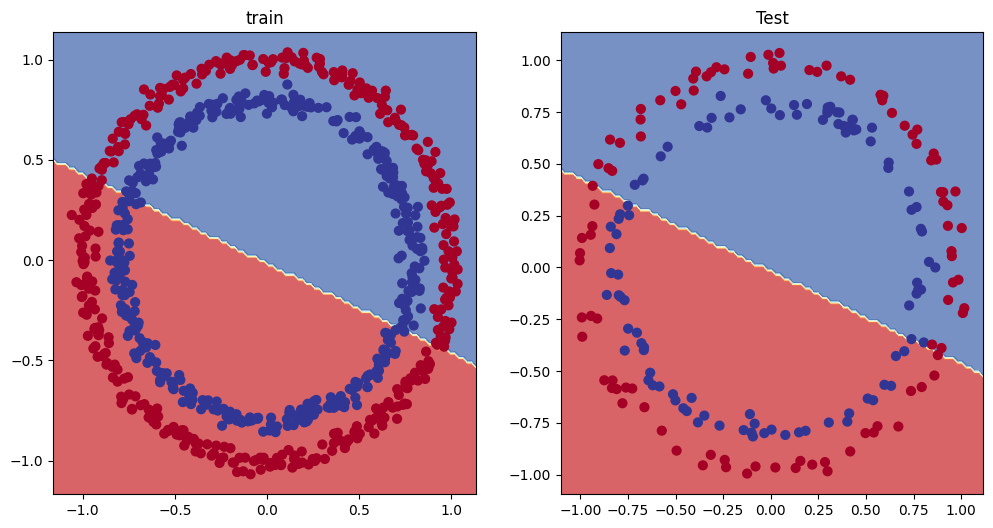

In [36]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_1, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, x_test, y_test)

In [37]:
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
x_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * x_regression + bias # linear regression formula

# Check the data
print(len(x_regression))
x_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [38]:
# Create train and test splits
train_split = int(0.8 * len(x_regression)) # 80% of data used for training set
x_train_regression, y_train_regression = x_regression[:train_split], y_regression[:train_split]
x_test_regression, y_test_regression = x_regression[train_split:], y_regression[train_split:]

# Check the lengths of each split
print(len(x_train_regression),
    len(y_train_regression),
    len(x_test_regression),
    len(y_test_regression))

80 80 20 20


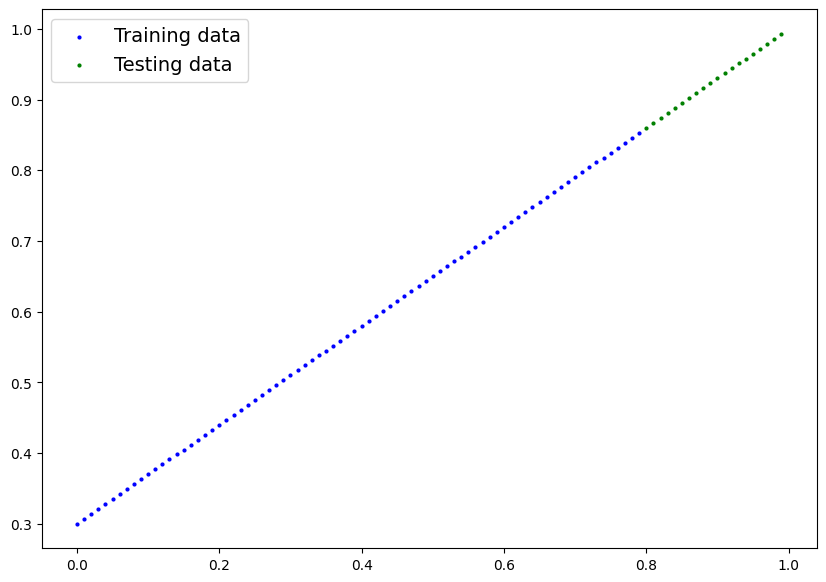

In [39]:
plot_predictions(train_data=x_train_regression,
                 train_labels= y_train_regression,
                 test_data= x_test_regression,
                 test_labels= y_test_regression);


In [40]:
model_2=nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)).to(device)
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [41]:
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_2.parameters(),
                          lr=0.1)

In [42]:
torch.manual_seed(42)
epochs=1000
x_train_regression, y_train_regression= x_train_regression.to(device), y_train_regression.to(device)
x_test_regression, y_test_regression=x_test_regression.to(device), y_test_regression.to(device)

In [43]:
for epoch in range(epochs):
  y_pred=model_2(x_train_regression)
  loss=loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_2.eval()
  with torch.inference_mode():
    test_pred=model_2(x_test_regression)
    test_loss=loss_fn(test_pred, y_test_regression)
  if epoch % 100==0:
    print(f"Epochs: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")



Epochs: 0 | Loss: 0.75986, Acc: 51.00% | Test Loss: 0.54143, Test Acc: 46.00%
Epochs: 100 | Loss: 0.09309, Acc: 51.00% | Test Loss: 0.02901, Test Acc: 46.00%
Epochs: 200 | Loss: 0.07376, Acc: 51.00% | Test Loss: 0.02850, Test Acc: 46.00%
Epochs: 300 | Loss: 0.06745, Acc: 51.00% | Test Loss: 0.00615, Test Acc: 46.00%
Epochs: 400 | Loss: 0.06107, Acc: 51.00% | Test Loss: 0.02004, Test Acc: 46.00%
Epochs: 500 | Loss: 0.05698, Acc: 51.00% | Test Loss: 0.01061, Test Acc: 46.00%
Epochs: 600 | Loss: 0.04857, Acc: 51.00% | Test Loss: 0.01326, Test Acc: 46.00%
Epochs: 700 | Loss: 0.06109, Acc: 51.00% | Test Loss: 0.02127, Test Acc: 46.00%
Epochs: 800 | Loss: 0.05599, Acc: 51.00% | Test Loss: 0.01426, Test Acc: 46.00%
Epochs: 900 | Loss: 0.05571, Acc: 51.00% | Test Loss: 0.00603, Test Acc: 46.00%


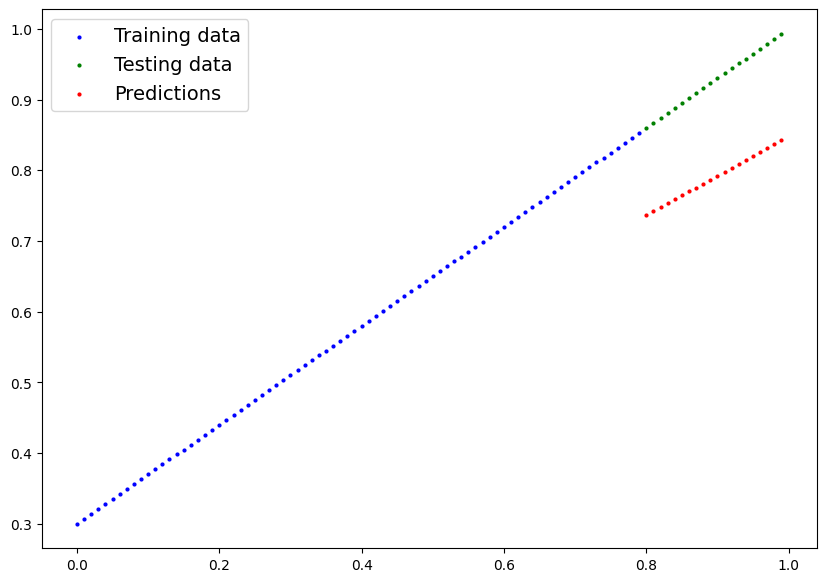

In [44]:
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_2(x_test_regression)

# Plot data and predictions with data on the CPU (matplotlib can't handle data on the GPU)
# (try removing .cpu() from one of the below and see what happens)
plot_predictions(train_data=x_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=x_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu());




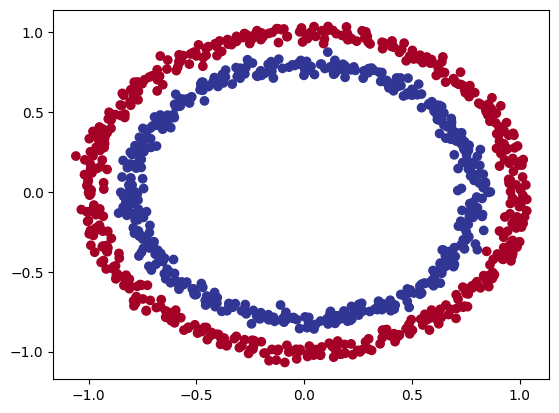

In [45]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
n_samples=1000
x, y=make_circles(n_samples,
                  noise=0.03,
                  random_state=42)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [46]:
# Convert to tensors and split into train and test sets
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42
)

x_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [47]:
# Build model with non-linear activation function
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # <- add in ReLU activation function
        # Can also put sigmoid in the model
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # Intersperse the ReLU activation function between layers
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [48]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

In [49]:
# Fit the model
torch.manual_seed(42)
epochs = 10000

# Put all data on target device
x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_3(x_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(x_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 1000 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test Loss: 0.69319, Test Accuracy: 50.00%
Epoch: 1000 | Loss: 0.56818, Accuracy: 87.75% | Test Loss: 0.57378, Test Accuracy: 86.50%
Epoch: 2000 | Loss: 0.04176, Accuracy: 99.88% | Test Loss: 0.06583, Test Accuracy: 100.00%
Epoch: 3000 | Loss: 0.01672, Accuracy: 99.88% | Test Loss: 0.03363, Test Accuracy: 100.00%
Epoch: 4000 | Loss: 0.01048, Accuracy: 100.00% | Test Loss: 0.02451, Test Accuracy: 99.50%
Epoch: 5000 | Loss: 0.00765, Accuracy: 100.00% | Test Loss: 0.01993, Test Accuracy: 99.50%
Epoch: 6000 | Loss: 0.00603, Accuracy: 100.00% | Test Loss: 0.01726, Test Accuracy: 99.50%
Epoch: 7000 | Loss: 0.00499, Accuracy: 100.00% | Test Loss: 0.01557, Test Accuracy: 99.50%
Epoch: 8000 | Loss: 0.00428, Accuracy: 100.00% | Test Loss: 0.01451, Test Accuracy: 99.50%
Epoch: 9000 | Loss: 0.00375, Accuracy: 100.00% | Test Loss: 0.01374, Test Accuracy: 99.50%


In [50]:
model_3.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.9036,  1.5960],
                      [-0.7052,  2.7153],
                      [-0.1549,  0.1427],
                      [-3.0099, -0.3671],
                      [ 0.8623, -2.9784],
                      [ 1.7082, -0.0545],
                      [ 2.3630,  0.5450],
                      [ 0.3410, -0.0998],
                      [ 0.5872,  0.8908],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.2418, -1.2439, -0.2872, -0.6927, -0.7581, -0.8380, -0.9570, -0.4252,
                      -0.1943, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[-0.0179, -0.9311,  0.2441, -0.4759, -0.5108, -0.1861, -0.4244,  0.2555,
                       -0.0917, -0.0997],
                      [ 1.6224,  2.6898,  0.1331,  2.8226,  2.7405,  1.5594,  2.2915,  0.0566,
                        0.9245, -0.1927],
                      [-0.3130, -0.124

In [51]:
torch.manual_seed(42)
epochs = 10000
x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

model_1.to(device)  # Move the model to the desired device

for epoch in range(epochs):
    model_1.train()
    y_logits = model_1(x_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_1.eval()
    with torch.inference_mode():
        test_logits = model_1(x_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)
    if epoch % 1000 == 0:
        print(f"Epochs: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")


Epochs: 0 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69468, Test Acc: 46.00%
Epochs: 1000 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69468, Test Acc: 46.00%
Epochs: 2000 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69468, Test Acc: 46.00%
Epochs: 3000 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69468, Test Acc: 46.00%
Epochs: 4000 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69468, Test Acc: 46.00%
Epochs: 5000 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69468, Test Acc: 46.00%
Epochs: 6000 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69468, Test Acc: 46.00%
Epochs: 7000 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69468, Test Acc: 46.00%
Epochs: 8000 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69468, Test Acc: 46.00%
Epochs: 9000 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69468, Test Acc: 46.00%


In [52]:
model_3.eval()
with torch.inference_mode():
  y_preds=torch.round(torch.sigmoid(model_3(x_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

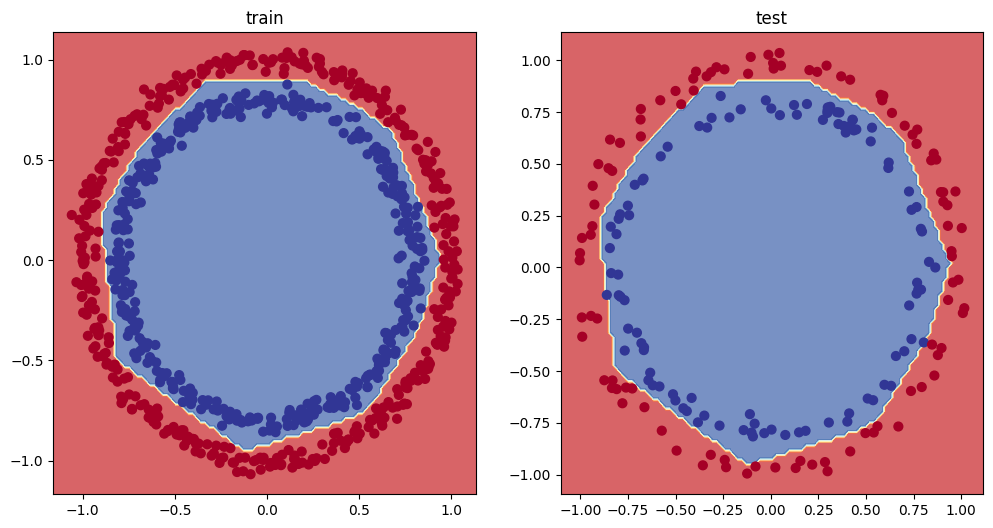

In [53]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_3, x_train, y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_3, x_test, y_test)

In [54]:
A=torch.arange(-10,10,1, dtype=torch.float32)

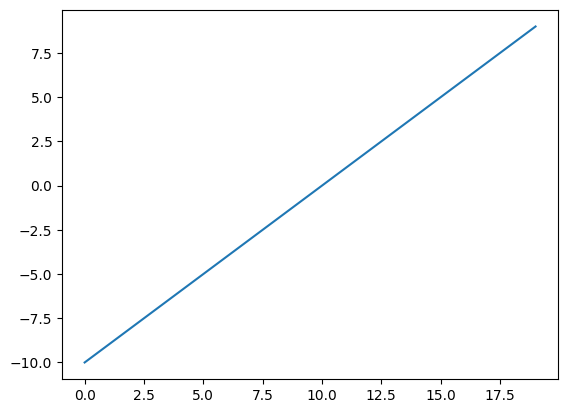

In [55]:
plt.plot(A)

In [56]:
def relu(x: torch.Tensor)-> torch.Tensor:
  return torch.maximum(torch.tensor(0), x)
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

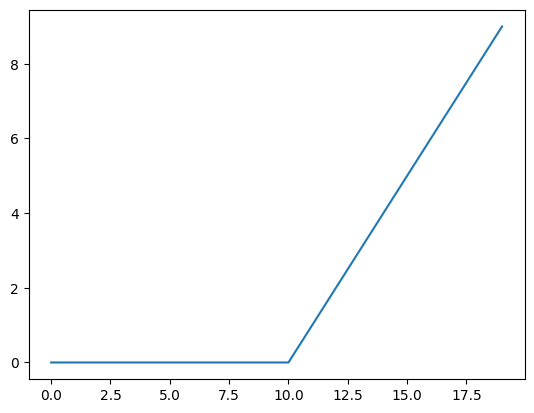

In [57]:
plt.plot(relu(A))

In [58]:
def sigmoid(x):
  return 1/(1+torch.exp(-A));


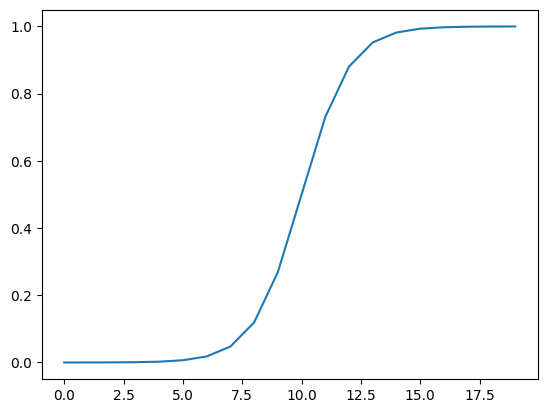

In [59]:
plt.plot(sigmoid(A))

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


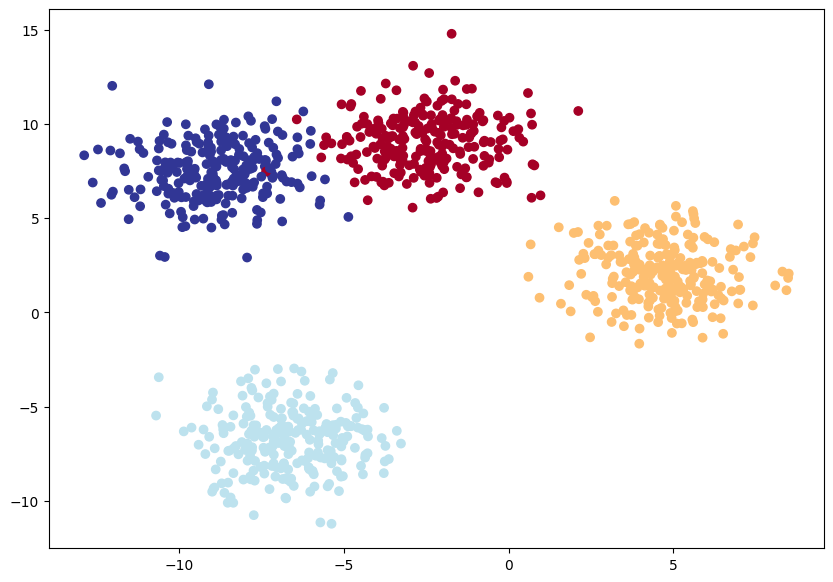

In [60]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
NUM_CLASSES=4
NUM_FEATURES=2
RANDOM_SEED=42
x_blob, y_blob=make_blobs(n_samples=1000,
                          n_features=NUM_FEATURES,
                          centers=NUM_CLASSES,
                          cluster_std=1.5,
                          random_state=RANDOM_SEED)
x_blob=torch.from_numpy(x_blob).type(torch.float)
y_blob=torch.from_numpy(y_blob).type(torch.LongTensor)
print(x_blob[:5], y_blob[:5])
x_blob_train, x_blob_test, y_blob_train, y_blob_test=train_test_split(x_blob,
                                                                      y_blob,
                                                                      test_size=0.2,
                                                                      random_state=RANDOM_SEED)
plt.figure(figsize=(10,7))
plt.scatter(x_blob[:, 0], x_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu );


In [61]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [62]:
class BlobModel(nn.Module):
  def __init__ (self, input_features, output_features, hidden_units=8):
    super().__init__()
    self.linear_layer_stack=nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        #nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        #nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )
  def forward(self, x):
    return self.linear_layer_stack(x)
model_4=BlobModel(input_features=2,
                  output_features=4,
                  hidden_units=8).to(device)
model_4


BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [63]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_4.parameters(), lr=0.1)

In [64]:
model_4.eval()
with torch.inference_mode():
  y_logits=model_4(x_blob_test.to(device))
y_logits[:10]

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852],
        [ 2.0878, -1.3728,  2.1248,  2.5052],
        [ 1.8310,  0.8851,  2.1674,  0.6006],
        [ 0.1412, -1.4742, -0.0360,  1.0373],
        [ 2.9426,  0.7047,  3.3670,  1.6184],
        [-0.0645, -1.5006, -0.2666,  0.8940]], device='cuda:0')

In [65]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [66]:
next(model_4.parameters()).device

device(type='cuda', index=0)

In [67]:
x_blob_test.device

device(type='cpu')

In [68]:
y_logits = model_4(x_blob_test.to(device))
y_pred_probs=torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852]], device='cuda:0',
       grad_fn=<SliceBackward0>)
tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951]], device='cuda:0',
       grad_fn=<SliceBackward0>)


In [69]:
torch.sum(y_pred_probs[0])

tensor(1., device='cuda:0', grad_fn=<SumBackward0>)

In [70]:
torch.max(y_pred_probs[0])

tensor(0.3715, device='cuda:0', grad_fn=<MaxBackward1>)

In [71]:
y_preds=torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([3, 3, 2, 1, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2,
        2, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 2, 1, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3,
        3, 3, 1, 3, 3, 1, 3, 2, 3, 1, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 3, 3, 2, 3, 3, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 3, 2, 2, 3, 3, 3, 1, 2,
        2, 3, 3, 1, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 1, 3, 2, 2,
        2, 2, 3, 3, 3, 2, 2, 1, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3,
        2, 2, 2, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3,
        1, 3, 2, 3, 3, 1, 2, 3], device='cuda:0')

In [72]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

In [73]:
torch.manual_seed(42)
epochs=1000
x_blob_train, y_blob_train=x_blob_train.to(device), y_blob_train.to(device)
x_blob_test, y_blob_test=x_blob_test.to(device), y_blob_test.to(device)
for epoch in range(epochs):
  model_4.train()
  y_logits=model_4(x_blob_train)
  y_pred=torch.softmax(y_logits, dim=1).argmax(dim=1)
  loss=loss_fn(y_logits, y_blob_train)
  acc=accuracy_fn(y_true=y_blob_train, y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_4.eval()
  with torch.inference_mode():
    test_logits=model_4(x_blob_test)
    test_preds=torch.softmax(test_logits, dim=1).argmax(dim=1)
    test_loss=loss_fn(test_logits, y_blob_test)
    test_acc=accuracy_fn(y_true=y_blob_test, y_pred=test_preds)

  if epoch % 100 ==0:
    print(f"epochs: {epoch} |test loss: {test_loss}| test acc: {test_acc} ")


epochs: 0 |test loss: 0.5786145925521851| test acc: 95.5 
epochs: 100 |test loss: 0.022926397621631622| test acc: 99.5 
epochs: 200 |test loss: 0.017038244754076004| test acc: 99.5 
epochs: 300 |test loss: 0.014989936724305153| test acc: 99.5 
epochs: 400 |test loss: 0.013892702758312225| test acc: 99.5 
epochs: 500 |test loss: 0.013177362270653248| test acc: 99.5 
epochs: 600 |test loss: 0.012653779238462448| test acc: 99.5 
epochs: 700 |test loss: 0.012240217998623848| test acc: 99.5 
epochs: 800 |test loss: 0.011896038427948952| test acc: 99.5 
epochs: 900 |test loss: 0.011598779819905758| test acc: 99.5 


In [74]:
model_4.eval()
with torch.inference_mode():
  y_logits=model_4(x_blob_test)
y_logits[:10]

tensor([[  6.1117,  18.9106, -22.9632, -14.6995],
        [  9.5662, -23.8503,   5.8412,  17.7025],
        [ -8.4025, -21.8530,  30.5466,  17.0857],
        [  2.1340,  14.6655, -13.7829, -11.2652],
        [ 13.2141,   3.9343, -21.4953,  -3.6479],
        [ 10.8391, -29.6208,   8.5481,  22.0345],
        [ -9.3843, -15.7081,  27.1174,  12.4538],
        [ 11.9275,  -3.3287, -13.8623,   1.9499],
        [ -7.8685, -31.8187,  37.6564,  24.6508],
        [ 12.1832,  -0.6223, -16.3792,  -0.1247]], device='cuda:0')

In [75]:
y_pred_probs=torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[2.7638e-06, 1.0000e+00, 6.5229e-19, 2.5312e-15],
        [2.9263e-04, 8.9892e-19, 7.0561e-06, 9.9970e-01],
        [1.2151e-17, 1.7504e-23, 1.0000e+00, 1.4255e-06],
        [3.6113e-06, 1.0000e+00, 4.4163e-13, 5.4759e-12],
        [9.9991e-01, 9.3284e-05, 8.4312e-16, 4.7522e-08],
        [1.3737e-05, 3.6845e-23, 1.3897e-06, 9.9998e-01],
        [1.4044e-16, 2.5184e-19, 1.0000e+00, 4.2822e-07],
        [9.9995e-01, 2.3677e-07, 6.3043e-12, 4.6427e-05],
        [1.6934e-20, 6.7194e-31, 1.0000e+00, 2.2477e-06],
        [9.9999e-01, 2.7456e-06, 3.9401e-13, 4.5159e-06]], device='cuda:0')

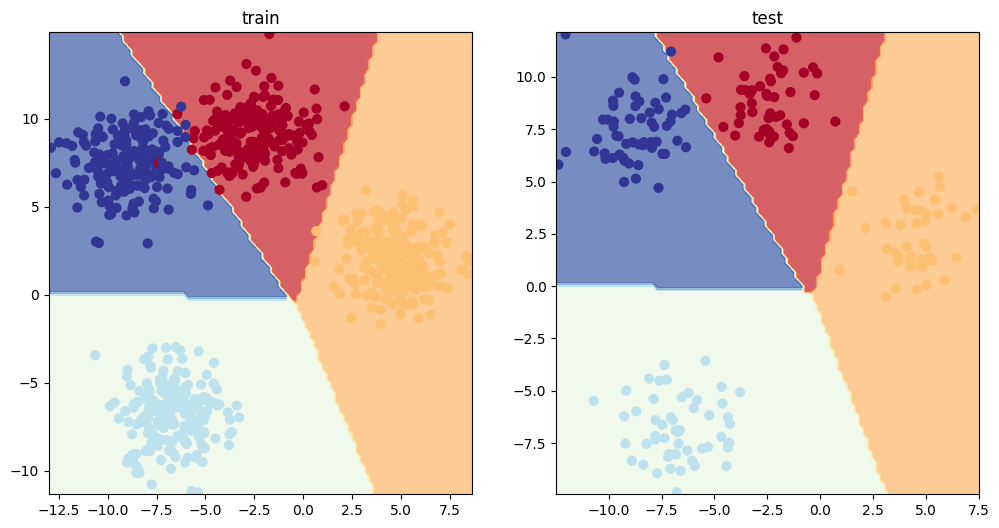

In [76]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_4, x_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_4, x_blob_test, y_blob_test)

In [77]:
!pip install torchmetrics
from torchmetrics import Accuracy
torchmetric_accuracy= Accuracy(task='multiclass', num_classes=4).to(device)
torchmetric_accuracy(y_preds, y_blob_test)


tensor(0.6800, device='cuda:0')